In [ ]:
import pandas as pd
a=pd.read_csv('/content/Bank_Transaction_Fraud_Detection.csv')
print(a)

                                 Customer_ID        Customer_Name  Gender  \
0       d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e           Osha Tella    Male   
1       7c14ad51-781a-4db9-b7bd-67439c175262      Hredhaan Khosla  Female   
2       3a73a0e5-d4da-45aa-85f3-528413900a35       Ekani Nazareth    Male   
3       7902f4ef-9050-4a79-857d-9c2ea3181940  Yamini Ramachandran  Female   
4       3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9         Kritika Rege  Female   
...                                      ...                  ...     ...   
159662  8c08b53b-2a0b-4778-9364-b8bd5cd535e1        Zilmil Parikh  Female   
159663  64c60e0a-0a26-490d-8ba4-303172683a64         Vinaya Dugar    Male   
159664  1b40fd3c-da3a-40c5-b8d6-1ca3f7bdd303           Ati Oommen    Male   
159665  895b9751-03de-44e8-b560-a07829cb8e25      Vaishnavi Wable  Female   
159666  8096ed85-8af4-44f0-b27b-0b43c6374397       Advaith Shenoy    Male   

        Age           State                City                Bank_Branch 

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')


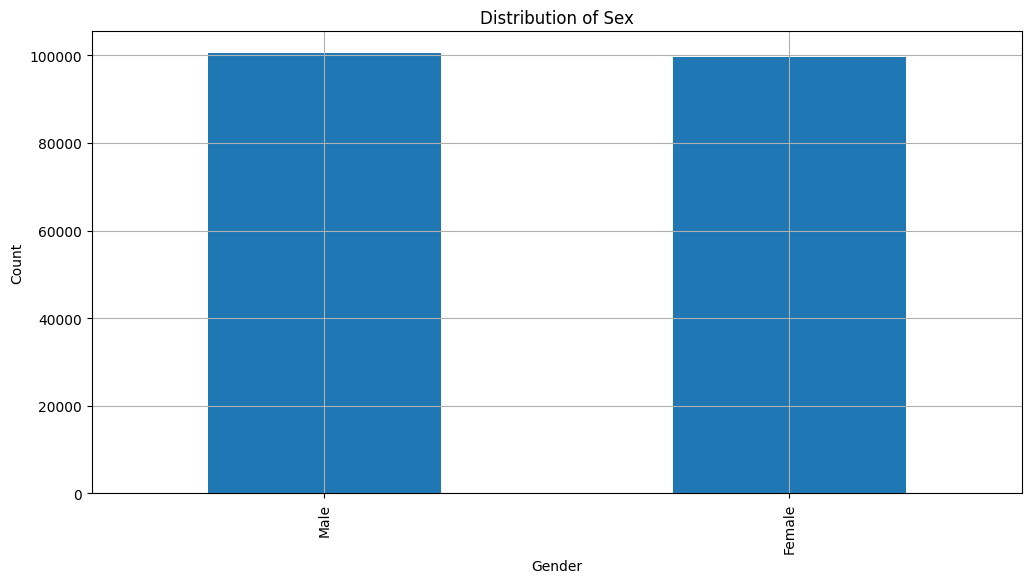

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataframe (assuming it's the Bank_Transaction_Fraud_Detection.csv)
a = pd.read_csv('/content/Bank_Transaction_Fraud_Detection.csv')

# Verify column names: This is important to make sure you're using the correct column
print(a.columns)

# Assuming 'Customer_Age' represents the age and 'sex' is a categorical column
# We'll plot the count of each sex category

# Group data by 'sex' and count occurrences
Gender_counts = a['Gender'].value_counts()

# Create a bar plot
Gender_counts.plot(kind='bar', figsize=(12, 6), title='Distribution of Sex')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')


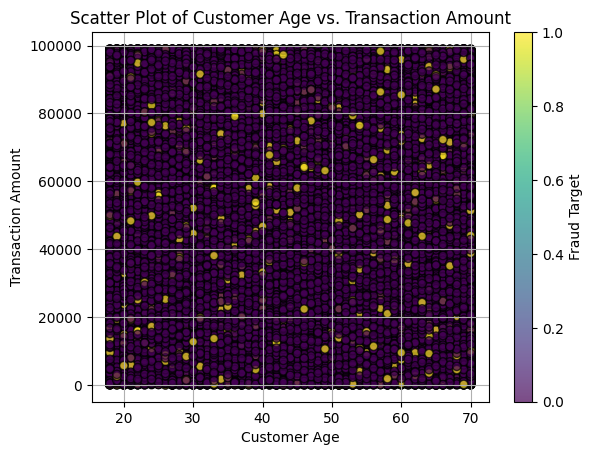

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd  # Assuming you've already imported pandas

# Check the actual column names in your DataFrame
print(a.columns)

# Replace 'step', 'amount', 'isFraud' with actual column names from your DataFrame
# Example: If your columns are 'step', 'amount', 'isFraud'
# Assuming your columns are actually 'step', 'amount', 'isFraud'
# If not, replace with the correct column names from your DataFrame
# Assuming your columns are 'Customer_Age', 'Transaction_Amount', 'Fraud_Target' instead of 'step', 'amount', 'isFraud'
scatter = plt.scatter(a['Age'], a['Transaction_Amount'], c=a['Is_Fraud'],
                      cmap='viridis', marker='o', edgecolor='black', alpha=0.7)

plt.xlabel('Customer Age')  # Update x-axis label
plt.ylabel('Transaction Amount')  # Update y-axis label
plt.title('Scatter Plot of Customer Age vs. Transaction Amount')  # Update title

# Add a colorbar to explain the color mapping
plt.colorbar(scatter, label='Fraud Target')  # Update colorbar label

plt.grid(True)
plt.show()

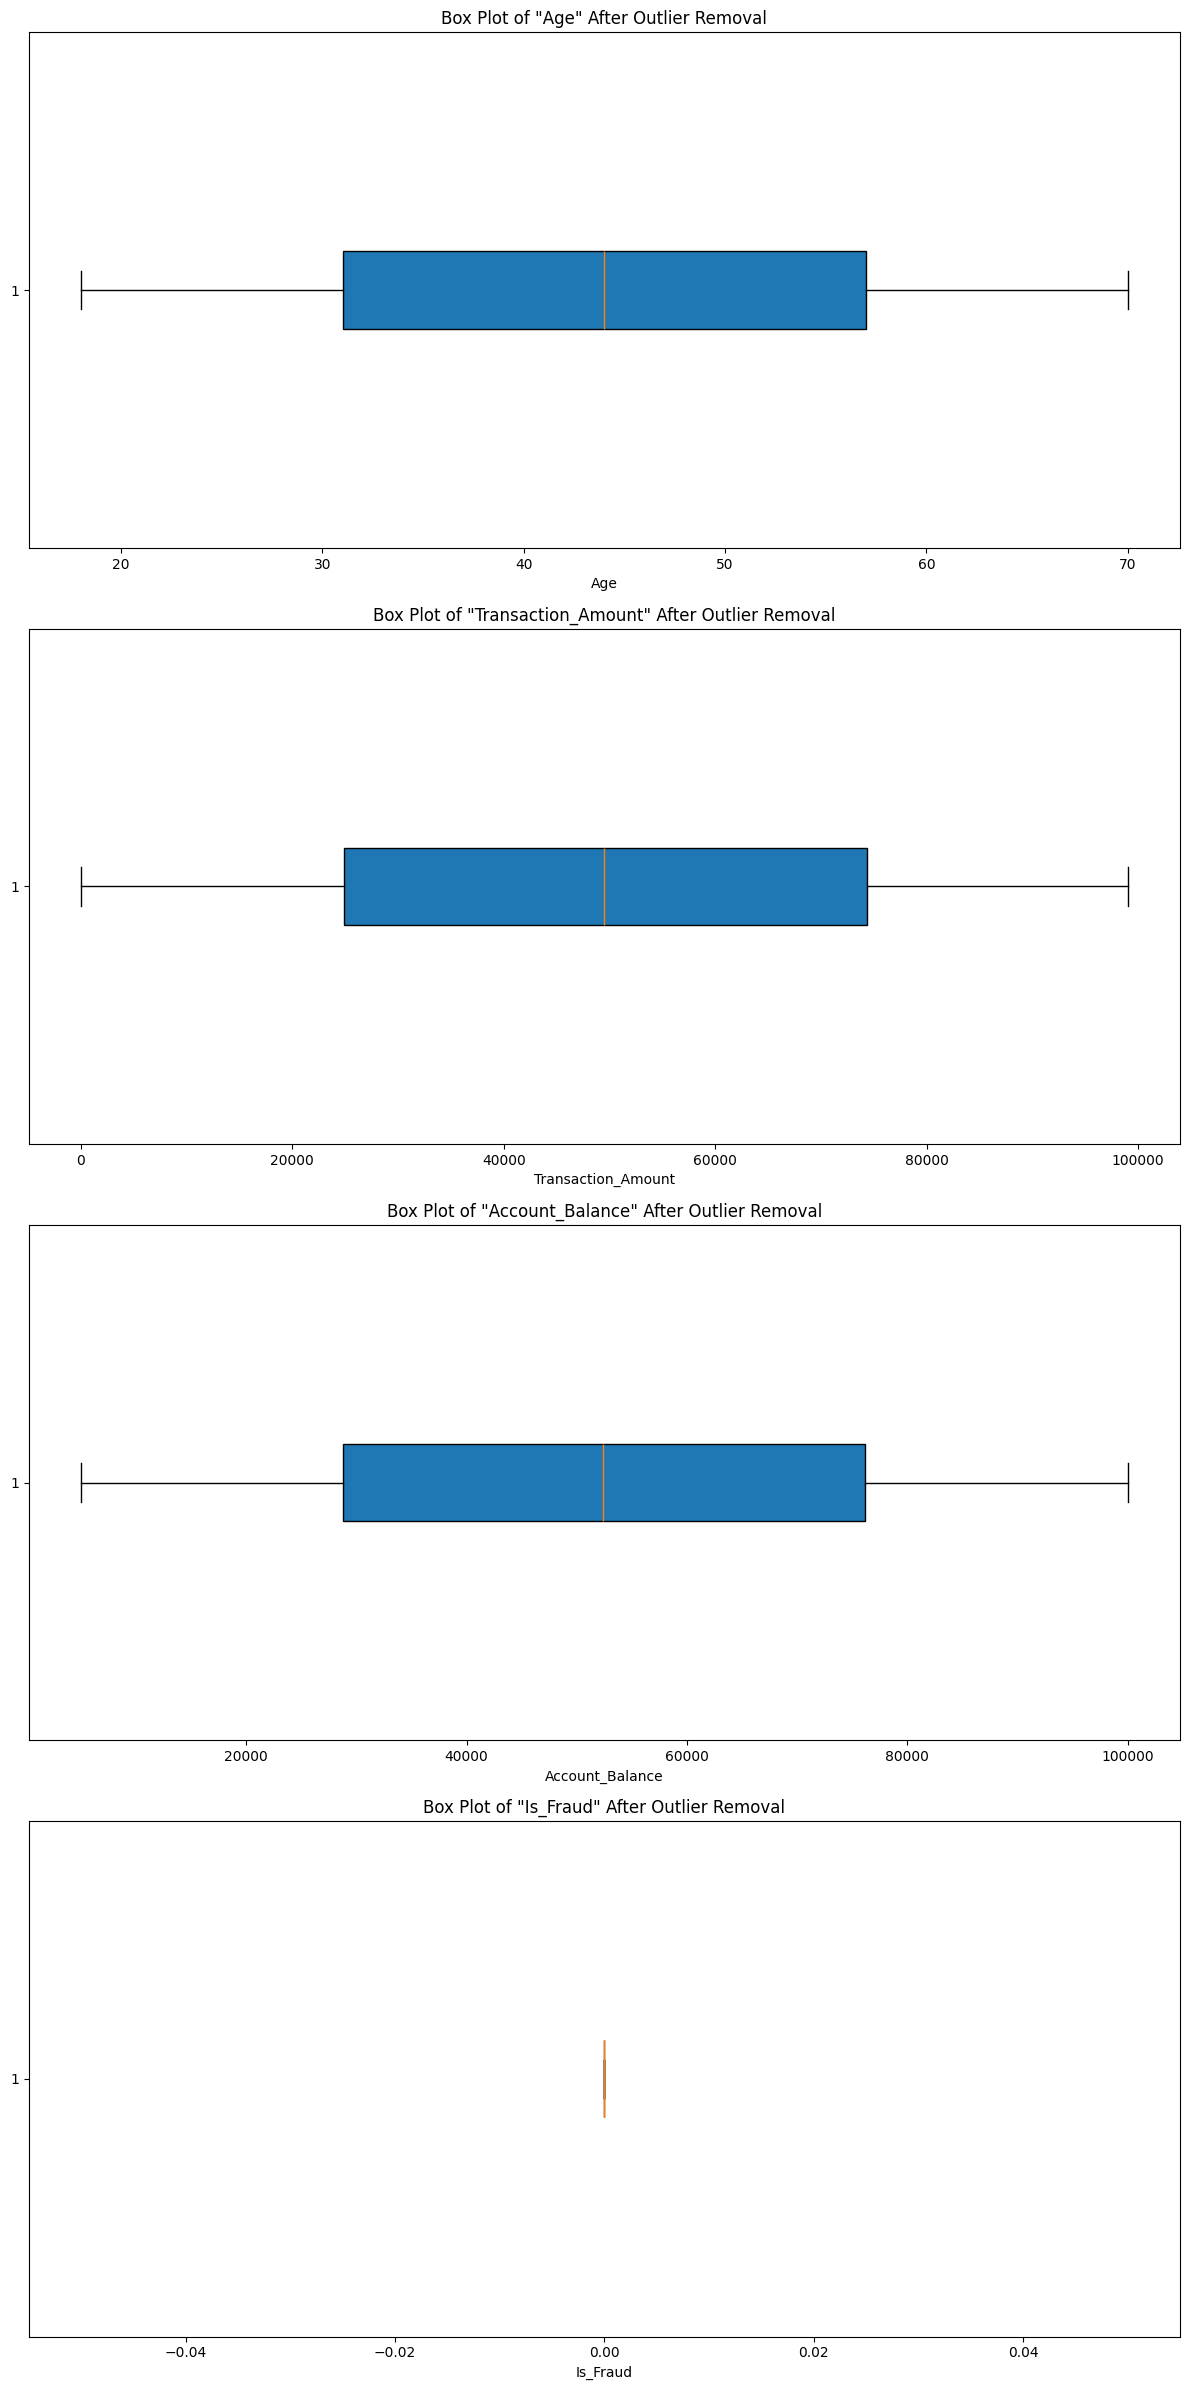

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def remove_outliers_iqr(data, column):
  """
  Removes outliers from a pandas DataFrame column using the IQR method.

  Args:
    data: pandas DataFrame
    column: Name of the column to remove outliers from

  Returns:
    pandas DataFrame with outliers removed
  """
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
  return data_filtered

# Load the dataframe
a = pd.read_csv('/content/Bank_Transaction_Fraud_Detection.csv')

# Get numerical columns (excluding object/categorical types)
numerical_cols = a.select_dtypes(include=np.number).columns.tolist()

# Create subplots for each numerical column
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(12, 6 * len(numerical_cols)))
# Adjust figsize as needed

for i, col in enumerate(numerical_cols):
    # Remove outliers for the current column
    a_filtered = remove_outliers_iqr(a, col)

    # Plot the boxplot after outlier removal
    axes[i].boxplot(a_filtered[col], vert=False, patch_artist=True)
    axes[i].set_title(f'Box Plot of "{col}" After Outlier Removal')
    axes[i].set_xlabel(col)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

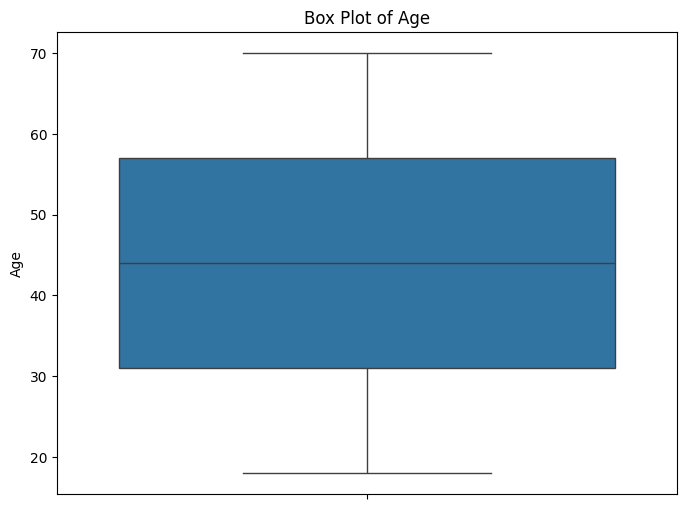

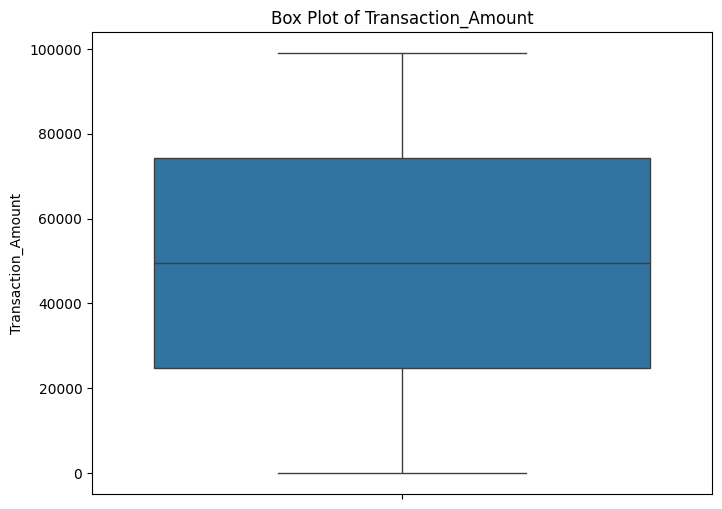

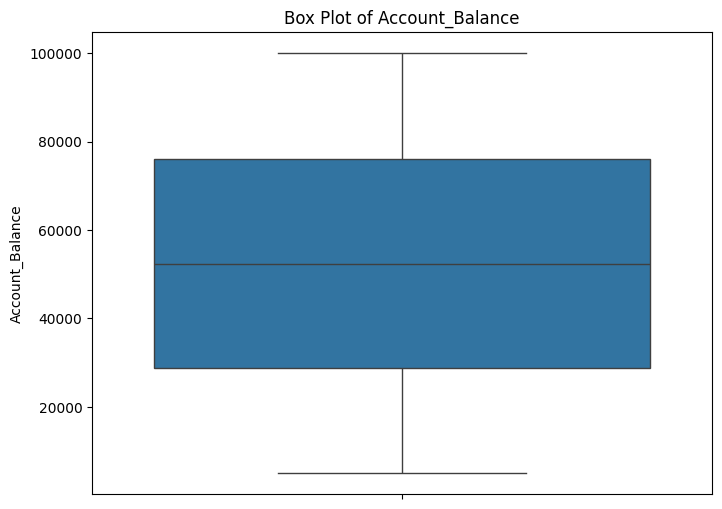

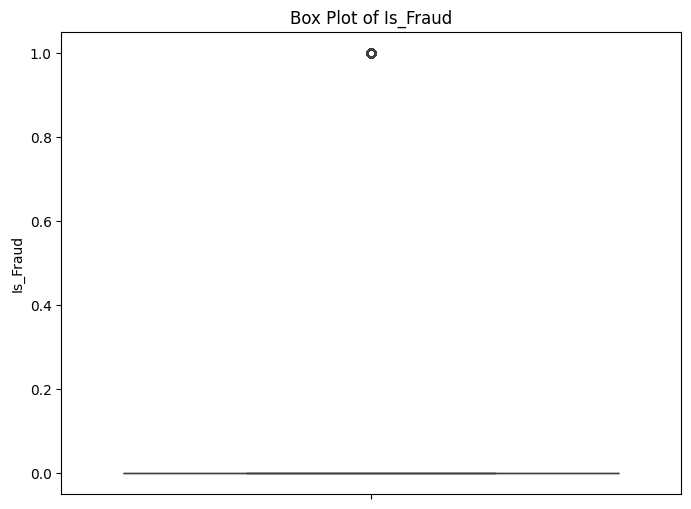

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_box(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    for column in numeric_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=df[column])
        plt.title(f'Box Plot of {column}')
        plt.ylabel(column)
        plt.show()

# Load dataset
df = pd.read_csv('/content/Bank_Transaction_Fraud_Detection.csv')

# Plot box plots for all numeric columns
plot_box(df)


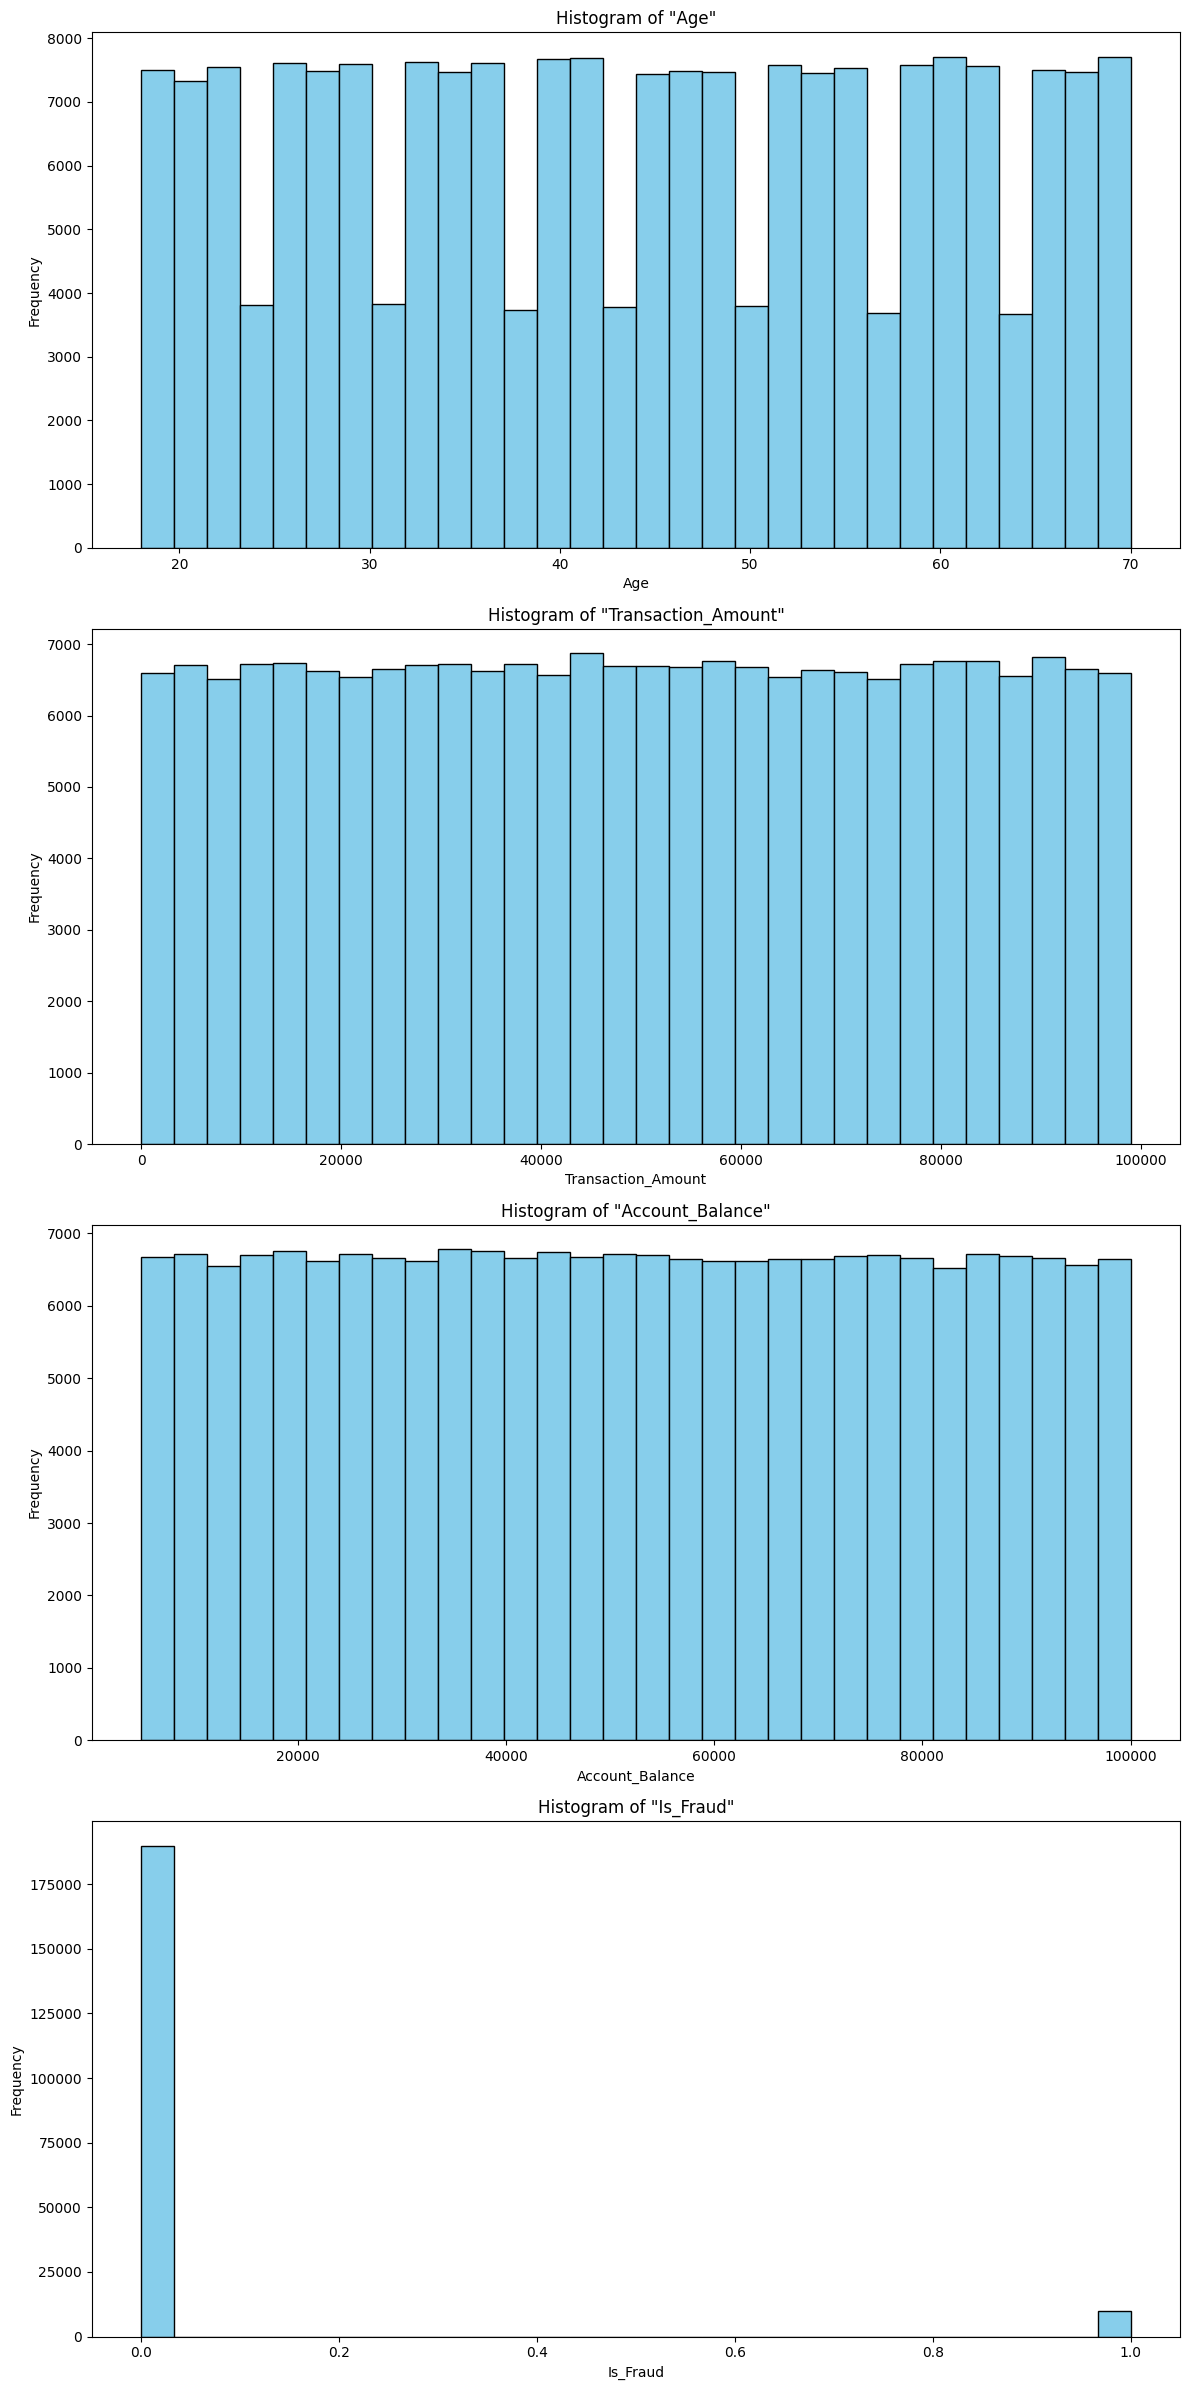

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataframe
a = pd.read_csv('/content/Bank_Transaction_Fraud_Detection.csv')

# Get numerical columns (excluding object/categorical types)
numerical_cols = a.select_dtypes(include=np.number).columns.tolist()

# Create subplots for each numerical column
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(12, 6 * len(numerical_cols)))
# Adjust figsize as needed

for i, col in enumerate(numerical_cols):
    # Plot the histogram
    axes[i].hist(a[col], bins=30, color='skyblue', edgecolor='black')  # Adjust bins as needed
    axes[i].set_title(f'Histogram of "{col}"')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

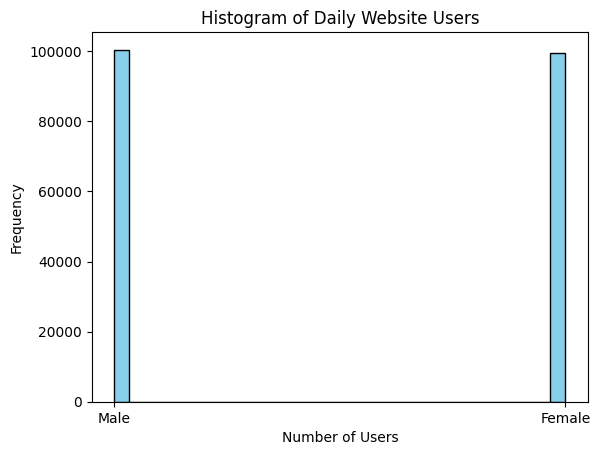

In [ ]:
import matplotlib.pyplot as plt
plt.hist(a['Gender'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Daily Website Users')
plt.xlabel('Number of Users')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis
import pandas as pd

# Assuming 'a' is your DataFrame
# ... (your code to load the DataFrame) ...

# Convert 'Gender' to numerical representation (0 for Male, 1 for Female)
a['Gender_Numeric'] = a['Gender'].map({'Male': 0, 'Female': 1})

# Now use 'Gender_Numeric' for calculations
numerical_cols = ['Gender_Numeric']  # Update the column name
summary_stats = {}
for col in numerical_cols:
    summary_stats[col] = {
        'Mean': a[col].mean(),
        'Median': a[col].median(),
        'Standard Deviation': a[col].std(),
        'Skewness': skew(a[col], nan_policy='omit'),
        'Kurtosis': kurtosis(a[col], nan_policy='omit')
    }
summary_df = pd.DataFrame(summary_stats)
print(summary_df)

                    Gender_Numeric
Mean                      0.497740
Median                    0.000000
Standard Deviation        0.499996
Skewness                  0.009040
Kurtosis                 -1.999918


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

file_path = "/content/Bank_Transaction_Fraud_Detection.csv"
a = pd.read_csv(file_path)

print("\nAvailable Columns:", a.columns.tolist())

# Select features and target variable
# Using 'Transaction_Amount' instead of 'Customer_ID' for numerical feature
X = a[['Gender', 'Age', 'Transaction_Amount']]
y = a['Is_Fraud']  # Assuming 'Is_Fraud' is your target variable

# Check if target variable has at least two unique classes
if len(y.unique()) < 2:
    raise ValueError("Target variable must have at least two unique classes!")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a ColumnTransformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Transaction_Amount']),  # Apply StandardScaler to numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['Gender']),  # Apply OneHotEncoder to categorical features
    ])

# Create a pipeline with preprocessing and the SVM classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(kernel='linear'))])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy:.2f}")


Available Columns: ['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date', 'Transaction_Time', 'Transaction_Amount', 'Merchant_ID', 'Transaction_Type', 'Merchant_Category', 'Account_Balance', 'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud', 'Transaction_Currency', 'Customer_Contact', 'Transaction_Description', 'Customer_Email']

Model Accuracy: 0.95


Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')
SVM Accuracy: 0.95
Decision Tree Accuracy: 0.90


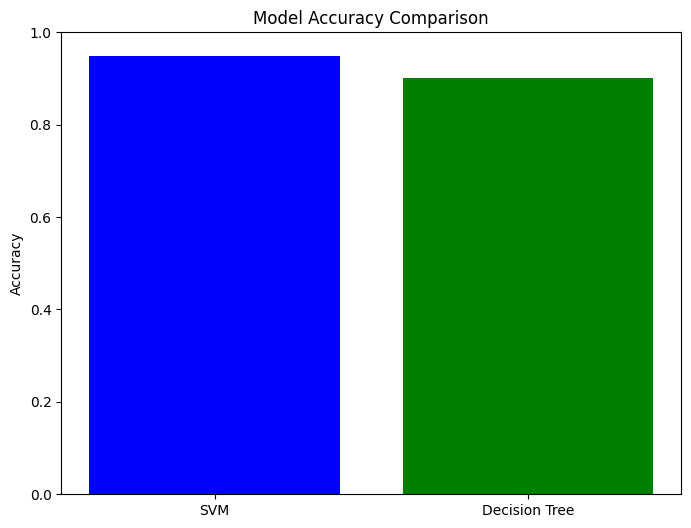

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer  # Import ColumnTransformer
from sklearn.pipeline import Pipeline  # Import Pipeline

# Load the dataframe
file_path = "/content/Bank_Transaction_Fraud_Detection.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Print the available columns to identify the correct names
print(df.columns)

# Select features and target variable using actual column names
# Replace 'sex', 'age', 'cp' with the correct column names from your DataFrame
X = df[['Gender', 'Age', 'Transaction_Amount']]  # Example: Using 'Gender', 'Age', 'Transaction_Amount'
y = df['Is_Fraud']  # Example: Using 'Is_Fraud' as the target variable

# Check if target variable has at least two unique classes
if len(y.unique()) < 2:
    raise ValueError("Target variable must have at least two unique classes!")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a ColumnTransformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Transaction_Amount']),  # Apply StandardScaler to numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['Gender']),  # Apply OneHotEncoder to categorical features
    ])

# Create a pipeline with preprocessing and the SVM classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(kernel='linear'))])


# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Create and train Decision Tree model (using the preprocessor)
tree_classifier = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state=42))])
tree_classifier.fit(X_train, y_train)


# Make predictions on the test set
svm_predictions = pipeline.predict(X_test)
tree_predictions = tree_classifier.predict(X_test)

# Calculate accuracy scores
svm_accuracy = accuracy_score(y_test, svm_predictions)
tree_accuracy = accuracy_score(y_test, tree_predictions)

# Print accuracy scores
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"Decision Tree Accuracy: {tree_accuracy:.2f}")

# Visualize accuracy scores
models = ['SVM', 'Decision Tree']
accuracies = [svm_accuracy, tree_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)  # Set y-axis limits to 0-1 for accuracy
plt.show()

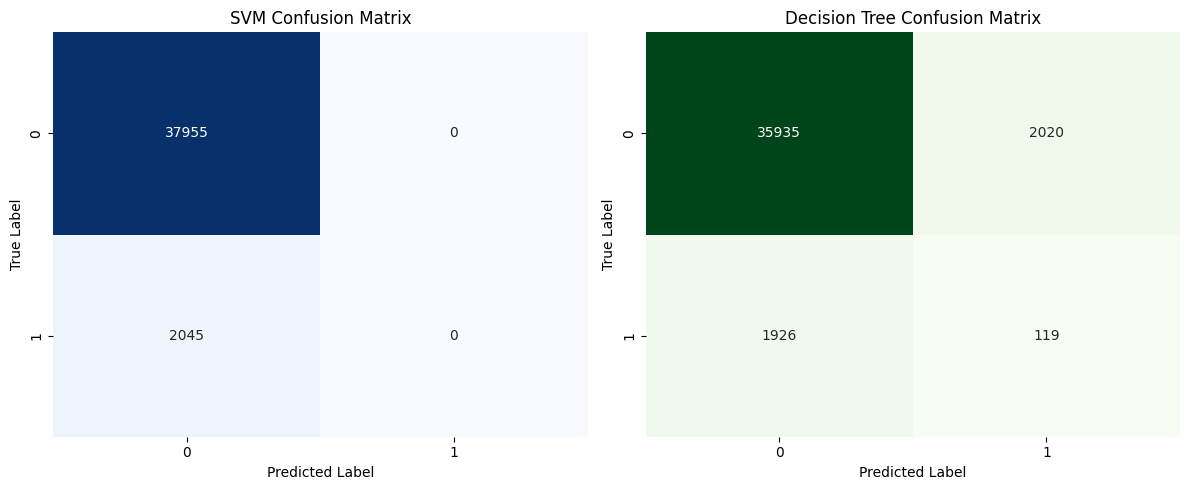

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for heatmap

# ... (rest of the code remains the same) ...

# Calculate confusion matrices
svm_cm = confusion_matrix(y_test, svm_predictions)
tree_cm = confusion_matrix(y_test, tree_predictions)

# Plot confusion matrices using seaborn heatmap
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(1, 2, 2)
sns.heatmap(tree_cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()